<a href="https://www.kaggle.com/code/gaganajayprajapati/exam-score-prediction?scriptVersionId=181756954" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
import random

In [2]:
df1 = pd.read_csv('/kaggle/input/students-exam-scores/Original_data_with_more_rows.csv',encoding='unicode_escape')
df2 = pd.read_csv('/kaggle/input/students-exam-scores/Expanded_data_with_more_features.csv',encoding='unicode_escape')

In [3]:
df1.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [4]:
df2.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [5]:
df1.shape

(30641, 9)

In [6]:
df1.info

<bound method DataFrame.info of        Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female     group B   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         995    male     group C    some high school      standard   
30637         996    male     group E  associate's degree  free/reduced   
30638         997    male     group C        some college      standard   
30639         998    male     group A    some high school  free/reduced   
30640         999  female     group D  associate's degree      standard   

        TestPrep  MathScore  ReadingScore  WritingScore  
0        

In [7]:
pd.isnull(df1).sum()

Unnamed: 0      0
Gender          0
EthnicGroup     0
ParentEduc      0
LunchType       0
TestPrep        0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

In [8]:
# drop null values
df1.dropna(inplace=True)

In [9]:
df1.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

In [10]:
df1['TestPrep'] = df1['TestPrep'].replace({'none':'0','completed':'1'})

In [11]:
df1.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,0,72,72,74
1,1,female,group C,some college,standard,1,69,90,88
2,2,female,group B,master's degree,standard,0,90,95,93
3,3,male,group A,associate's degree,free/reduced,0,47,57,44
4,4,male,group C,some college,standard,0,76,78,75


In [12]:
df = df1.drop('Unnamed: 0',axis=1)

In [13]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000
mean,66.749355,69.624980,68.468327
std,15.206049,14.671572,15.307814
min,0.000000,10.000000,5.000000
25%,56.000000,60.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,78.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [14]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,0,72,72,74
1,female,group C,some college,standard,1,69,90,88
2,female,group B,master's degree,standard,0,90,95,93
3,male,group A,associate's degree,free/reduced,0,47,57,44
4,male,group C,some college,standard,0,76,78,75


Intercept:  7.984168807706645
Coefficients:  [0.56359811 0.28516368]
Slope:  0.563598110421357


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


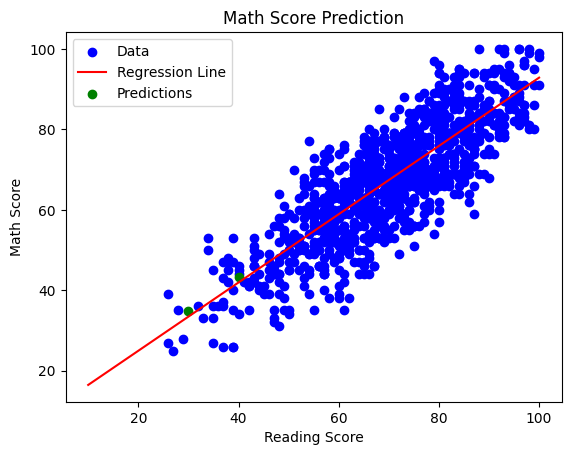

In [15]:
# Assuming df is your DataFrame containing the data
X = df[['ReadingScore', 'WritingScore']]
y = df['MathScore']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Print model coefficients
print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)
print("Slope: ", model.coef_[0])

# Create new data for predictions
new_data = pd.DataFrame(np.array([[30, 35], [40, 45]]), columns=['ReadingScore', 'WritingScore'])

# Predict on new data
predictions = model.predict(new_data)

# Sample size for plotting
sample_size = 1000

# Sample random indices from your data
sample_indices = random.sample(range(len(X)), sample_size)

# Extract the sampled data points
sampled_X = X.iloc[sample_indices]
sampled_y = y.iloc[sample_indices]

# Plot original data
plt.scatter(sampled_X['ReadingScore'], sampled_y, color='blue', label='Data')

# Plot the regression line
x_values = np.linspace(X['ReadingScore'].min(), X['ReadingScore'].max(), 100)
y_values = model.predict(np.column_stack((x_values, x_values)))  # Include both features
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Plot predictions
plt.scatter(new_data['ReadingScore'], predictions, color='green', label='Predictions')

plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.title('Math Score Prediction')
plt.legend()
plt.show()
